<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/saskeli/x/blob/master/extra.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>



## Extra stuff

[[ 4.68 -4.32]
 [-4.32  4.68]]
[[ 0.36  0.  ]
 [ 0.    9.  ]]


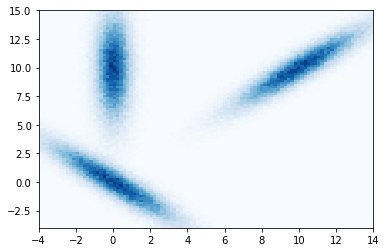

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, pi

def rot(a):
    return np.array([[cos(a), -sin(a)], [sin(a),cos(a)]])

def get_cov(a, b, angle):
    T=np.matmul(rot(angle), np.array([[a,0],[0,b]]))
    return np.matmul(T, T.T)  

#Z=np.random.rand(100,100)
mean1 = [0,0]
cov1 = get_cov(0.6, 3, angle=pi/4)
print(cov1)
mean2 = [10,10]
cov2 = get_cov(0.6, 3, angle=3*pi/4)
mean3 = [0,10]
#cov3 = [[1,0], [0,0.2]]
cov3 = get_cov(0.6, 3, angle=0)
print(cov3)
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100000).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100000).T
x3, y3 = np.random.multivariate_normal(mean3, cov3, 100000).T
x=np.hstack([x1,x2, x3])
y=np.hstack([y1,y2, y3])
#plt.imshow(Z)
plt.hist2d(x, y, bins=100, cmap='Blues', range=[[-4,14],[-4,15]]);

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(100, 3, centers=4, random_state=2, cluster_std=1.5)
X -= np.min(X)
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [3]:
# Print fitted parameters of a model
def print_parameters(model):
    for key in dir(model):
        if key[0] != '_' and key[-1] == '_':
            print(key, getattr(model, key))

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);
print_parameters(model)

class_count_ [ 25.  25.  25.  25.]
class_prior_ [ 0.25  0.25  0.25  0.25]
classes_ [0 1 2 3]
sigma_ [[ 1.0946319   2.97492908  2.23558279]
 [ 3.90434855  2.39825761  2.12075363]
 [ 4.02282753  1.08001985  2.00866118]
 [ 1.5518254   2.15081152  1.78461975]]
theta_ [[ 11.99924879   3.56993652  14.54246237]
 [ 12.21661454  11.91944359  10.33421666]
 [  7.61512418  15.72745661   9.84059583]
 [  8.2674654   16.11792104  13.40862968]]


In [5]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000,2)
ynew = model.predict(Xnew)

ValueError: operands could not be broadcast together with shapes (2000,2) (3,) 

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/saskeli/x/blob/master/extra.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
